In [1]:
%%capture
%pip install plotly pandas numpy matplotlib seaborn ipympl itables
%pip install 

# Common code and variables

In [2]:
%matplotlib widget

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
# mpl.use('pgf')

from datetime import datetime as dt
import math

 
from matplotlib import pyplot as plt, ticker
import seaborn as sns
import itables as it
from itables import init_notebook_mode, show 
init_notebook_mode(all_interactive=True)
sns.set_theme(style="whitegrid")
plt.style.use('seaborn')

width = 800

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family":  "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 17,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

<IPython.core.display.Javascript object>

/tmp/ipykernel_46574/1419734564.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    elif width == 'acm':
        width_pt = 506.295
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 + 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in / golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [4]:
databases = { 'ClickhouseDB': '#orange',
             'ClickHouse': '#orange',
              'DatalayertsDB': '#75BDA7', 
              'TimescaleDB': '#c78181', 
              'InfluxDB': '#c78351',
              'PostgresDB':'orange',}
databases_modes = { 'ClickhouseDB_dedicated_regular': '#75BBA1',
             'ClickhouseDB_dedicated_irregular': '#c77581',
              'DatalayertsDB_dedicated_regular': '#75BDA7', 
              'DatalayertsDB_dedicated_irregular': '#75BBA1', 
              'TimescaleDB_dedicated_regular': '#c78181', 
             'TimescaleDB_dedicated_irregular': '#c78242', 
              'InfluxDB_dedicated_regular':'#8371ff',
              'InfluxDB_dedicated_irregular':'#8381rr',
               'PostgresDB_dedicated_regular':'#8791ff',
              'PostgresDB_dedicated_irregular':'#8791rr',
              'DummyDB_dedicated_regular':'#8791ff',
              'DummyDB_dedicated_irregular':'#8791rr'}
databases_dims = {
    'ClickhouseDB_1': '#8791rr',
             'InfluxDB_1': '#8791rr',
              'DatalayertsDB_1': '#75BDA7', 
              'TimescaleDB_1': '#c78181', 
              'PostgresDB_1':'8791rr',
}
labels = { 'ClickhouseDB': 'ClickHouse',
              'InfluxDB': 'InfluxDB', 
          'PostgresDB':'PostgreSQL',    
          'TimescaleDB': 'TimescaleDB',
          'DatalayertsDB': 'DatalayerTS',
              }
labels_dims = { 'ClickhouseDB_1': 'ClickHouse 1Dim',
              'InfluxDB': 'InfluxDB', 
          'PostgresDB':'PostgreSQL',    
          'TimescaleDB': 'TimescaleDB',
          'DatalayertsDB': 'DatalayerTS',
              }
labels_modes = {'ClickhouseDB_dedicated_regular': 'ClickhouseDB_dedicated_regular',
             'ClickhouseDB_dedicated_irregular': 'ClickhouseDB_dedicated_irregular',
              'DatalayertsDB_dedicated_regular': 'DatalayertsDB_dedicated_regular', 
              'DatalayertsDB_dedicated_irregular': 'DatalayertsDB_dedicated_irregular', 
              'TimescaleDB_dedicated_regular': 'TimescaleDB_dedicated_regular', 
             'TimescaleDB_dedicated_irregular': 'TimescaleDB_dedicated_irregular', 
              'PostgresDB_dedicated_regular':'PostgresDB_dedicated_regular',
              'PostgresDB_dedicated_irregular':'PostgresDB_dedicated_irregular',
              'DummyDB_dedicated_regular':'DummyDB_dedicated_regular',
              'DummyDB_dedicated_irregular':'DummyDB_dedicated_irregular',
                'InfluxDB_dedicated_regular':'InfluxDB_dedicated_regular',
              'InfluxDB_dedicated_irregular':'InfluxDB_dedicated_irregular',
              }
modes = {
    'dedicated_irregular': '#f5700a',
             'dedicated_regular': '#8791ff',
              'mixed_irregular': '#75BDA7', 
              'mixed_regular': '#c78181', 
}
color_discrete_map_extra = { 'ClickhouseDB': 'grey', 
                            'InfluxDB': '#c78181', 
                            'TimescaleDB': 'grey', 
                            'InfluxDBExtended' : '#orange' }
colnamesRead = ['Date','SucceededDataPoints','FailedDataPoints',
                'Operation','Latency','Mode','TargetDatabase','ClientLatency','ClientsNumber','SensorsNumber','ContentStartDate',
                'Duration','Iteration','Aggregations','Dimensions'] 

colnamesWrite = ['Date','SucceededDataPoints','FailedDataPoints',
                'Operation','Latency','Mode','TargetDatabase','ClientLatency','ClientsNumber','SensorsNumber','ContentStartDate',
                'BatchSize','Iteration','Dimensions'] 
colnames  = ['Timestamp','SucceededDataPoints','FailedDataPoints','Operation','Latency','Mode','Percentage','TargetDatabase','ClientLatency','ClientsNumber','SensorsNumber','StartDate','BatchSize','Duration','Iteration','Aggregation','Dimensions'] 


syscolnames = ['Timestamp','TargetDatabase','Operation','ClientsNumber','BatchSize','Dimensions','Percentage','SensorsNumber','Mode','CpuTotal','CpuSystem','CpuUser','CpuIOWait','CpuContextSwitches','CpuSysCalls','MemActive','MemAvailable','MemBuffers','MemCached','MemFree','MemInActive','MemTotal','MemShared','MemUsed','SwapFree','SwapSin','SwapSout','SwapTotal','SwapUsed','DiskReadBytes','DiskReadCount','DiskWriteBytes','DiskWriteCount','FsDeviceName','FsFree','FsFs_Type','FsKey','FsMnt_Point','FsPercent','FsSize','FsUsage','NetworkCumulativeConnections','NetworkCumulativeReceives','NetworkCumulativeTransmissions','NetworkConnections','NetworkTransmissions','NetworkReceives','NetworkIsUp','NetworkSpeed','ProcessCpuPercent','ProcessCpuTimes','ProcessIOCounters','ProcessMemoryInfo','ProcessMemoryPercent','ProcessThreadsNumber','ProcessStatus']
 




legend_kwargs = dict(borderpad=0.5, frameon=True, framealpha=1, facecolor='white', edgecolor='#F5F5F5', ncol=2, title=None)

 

In [5]:
## System Metrics Helpers
def to_megabytes(x):
    return x / 1e6

def to_mbps(x):
    return x * 8 / 1e6

def used_mem(x):
    l =  x * 100 / 32e9
    return l

def plot_database(ax, data, key, func, x=None, label=None):
    if func == 'log':
        ax.set_yscale('log')
    elif callable(func):
        data = func(data)
    if x is None:
        x = pd.Series(range(len(data)))
    return ax.plot(x, data, label=label, color=databases[key])

## create tables

In [6]:
# resultsR_OLD  = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/IonosSave-23-12/AllRead.csv', sep=",", on_bad_lines = 'warn' ) # 
# resultsW_OLD  = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/IonosSave-23-12/AllWrite.csv', sep=",", on_bad_lines = 'warn' ) # 
# resultsR_DLTS2  = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/DLTS-new-config(from24-12)IonosSave-1-2/AllRead.csv', sep=",", on_bad_lines = 'warn' ) # 
# resultsW_DLTS2  = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/DLTS-new-config(from24-12)IonosSave-1-2/AllWrite.csv', sep=",", on_bad_lines = 'warn' ) # 
# resultsR = pd.merge(resultsR_OLD, resultsR_DLTS2, how='outer') ##.loc[resultsR_OLD['TargetDatabase'].str.contains('Datalayer')== False]
# resultsW = pd.merge(resultsW_DLTS2, resultsW_OLD  , how='outer') ## .loc[resultsW_OLD['TargetDatabase'].str.contains('Datalayer')== False]

results_CH_R =pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/IonosSave-23-12/AllRead.csv', sep=",", on_bad_lines = 'warn' ) 
results_IF_R = 
results_DLTS_R = 
results_TSIR_R = 
results_TSR_R = 

results_CH_L =
results_IF_L = 
results_DLTS_L = 
results_TSIR_L = 
results_TSR_L = 










# metrics
results = pd.merge(resultsR, resultsW, how='outer')
# , on=colnames, left_on=None, right_on=None,
#          left_index=False, right_index=False, sort=True,
#          suffixes=('_R', '_W'), copy=True, indicator=False,
#          validate=None).reset_index() 

results = results.rename( columns={"Date":"Timestamp","WLPercentage":"Percentage"})

results['Timestamp'] =  pd.to_datetime(results['Timestamp'], unit='ms' , errors = 'coerce' )
results['Latency'] = pd.to_numeric(results['Latency'], errors = 'coerce')
results['LikelyError'] = results['Latency'].loc[(results['Latency'] == 0 ) | (results['Latency'].isna() ) ]
results['BatchSize'] = pd.to_numeric(results['BatchSize'], errors = 'coerce')
results['Dimensions'] = pd.to_numeric(results['Dimensions'], errors = 'coerce')

results['ClientsNumber'] = pd.to_numeric(results['ClientsNumber'], errors = 'coerce')
results['SucceededDataPoints'] = pd.to_numeric(results['SucceededDataPoints'] , errors = 'coerce' )
results  = results.sort_values(by=['TargetDatabase', 'Timestamp' ]).loc[results['Latency'] > 0 ].loc[results['Dimensions'] > 0 ].loc[results['SucceededDataPoints'] > 0 ]
results['Regularity']= results['Mode'].str.extract('\_(.*)', expand=False)
results = results.assign(ValueArrays=lambda x: x.SucceededDataPoints * x.ClientsNumber ).assign(ValuePoints=lambda x:  x.ValueArrays * x.Dimensions
   ).assign(PointsPerMS = lambda x: x.ValuePoints  / x.Latency 
   ).assign(ApprxMBpS=lambda x:  (x.PointsPerMS * 8 / 1000000  ) * 1000
   ) 


database_groups = results.set_index('Timestamp').groupby(['TargetDatabase', 'Mode','Operation','ClientsNumber', 'BatchSize','Duration', 'Dimensions'] , as_index=False, dropna=False) # 


results_rates =  database_groups.agg(
    {  "Latency":'mean' , "ApprxMBpS":'mean'  }# APPRxMBpS  :  MS to S -> DataArrays*Dimensions =Dtapaints. ->  double to Byte -> byte to MB  IMPORTANT!! DLTS stores Double, so practically doubles the ingestion
    )

results_rate_with_DummyDB = results_rates
results_rates=results_rates.loc[results_rates['TargetDatabase'] != "DummyDB" ]
  
top_rates= results_rates.groupby(['TargetDatabase', 'Mode','BatchSize','ClientsNumber','Dimensions'], as_index=False)['ApprxMBpS'].max().groupby(['TargetDatabase', 'Mode'], as_index=False , group_keys=True)['ApprxMBpS'].max().merge( results_rates)

results_ratesW=results_rates.loc[results_rates['Operation'].str.contains('Ingestion')] 
result_ratesR=results_rates.loc[results_rates['Operation'].str.contains('Quer')] 




queries_results  = results.loc[results['Operation'].str.contains('Quer') ]



/tmp/ipykernel_46574/3506564711.py:1: DtypeWarning: Columns (0,1,2,4,6,8,9,10,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  resultsR_OLD  = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/IonosSave-23-12/AllRead.csv', sep=",", on_bad_lines = 'warn' ) #
Skipping line 891: expected 15 fields, saw 26
Skipping line 2101: expected 15 fields, saw 18

Skipping line 281526: expected 15 fields, saw 16
Skipping line 281897: expected 15 fields, saw 26
Skipping line 317469: expected 15 fields, saw 16

/tmp/ipykernel_46574/3506564711.py:2: DtypeWarning: Columns (0,1,2,4,6,8,9,10,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  resultsW_OLD  = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/IonosSave-23-12/AllWrite.csv', sep=",", on_bad_lines = 'warn' ) #
/tmp/ipykernel_46574/3506564711.py:3: DtypeWarning: Columns (0,1,2,4,6,8,9,10,12,13,14,15) have mixed types. Speci

In [7]:
path = './graphs/'
def _query_stat(group):
    lat = group['Latency']
    return pd.Series({ 'avg': lat.mean(), '95': lat.quantile(0.95),'min': lat.min(), 'max': lat.max(),  'stddev': lat.std()})

def _query_support(col):
    return pd.Series( {'support': col[col.columns[0]].count()  , "CN" :    col.ClientsNumber.min() } ) 



def show_and_print_support(source, name , path, filterLowSupport,NormalizeWithBN):
    dbs = source.groupby(["TargetDatabase",'Operation','Mode','BatchSize','ClientsNumber','Dimensions','Percentage']
                         ).apply(_query_support  ) 
    
    
    if NormalizeWithBN == True:
        dbs=dbs.assign(Support_CN_Normlzd=lambda x: (
                             x.support  / x.CN)   )
        
    
    if filterLowSupport == True & NormalizeWithBN == True:
        dbs = dbs.loc[dbs["Support_CN_Normlzd"]<dbs["Support_CN_Normlzd"].quantile(0.25)]
    if filterLowSupport == True & NormalizeWithBN == False:
        dbs = dbs.loc[dbs["support"]<dbs["support"].quantile(0.25)]
    show_and_print(dbs, name, path)
    
    
def show_query_stat(qtype):
    dbs = queries_results[queries_results['Operation'] == qtype].groupby(['Mode',"TargetDatabase"]).apply(_query_stat)
    show(dbs)
    print_query_stat(qtype,path)
    
def print_query_stat(qtype,  path):
    path = str(path)
    dbs = queries_results[queries_results['Operation'] == qtype].groupby(['Mode',"TargetDatabase"]).apply(_query_stat)
    f = open(str(path)+str(qtype)+'.html', 'w')
    f.write(str(it.to_html_datatable(dbs, caption=None, connected=True)))
    f.close()
    
def show_and_print(content, name, path):
    name = str(name)
    path = str(path)
    show(content)
    f = open(str(path)+str(name)+'.html', 'w')
    f.write(str(it.to_html_datatable(content, caption=None, connected=True)))
    f.close()
    

In [8]:
# system metrics
systemmetricsOLD = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/IonosSave-23-12/AllGlances.csv', sep=",",  names = syscolnames, on_bad_lines = 'warn' )
systemmetricsDLTS2 = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/DLTS-new-config(from24-12)IonosSave-1-2/AllGlances.csv', sep=",",  names = syscolnames, on_bad_lines = 'warn' )
systemmetrics = pd.merge(systemmetricsOLD.loc[resultsR_OLD['TargetDatabase'].str.contains('Datalayer')== False], systemmetricsDLTS2, how='outer')
 

systemmetrics=systemmetrics.rename( columns={"Database":"TargetDatabase"})

systemmetrics['Timestamp'] =  pd.to_datetime(systemmetrics['Timestamp'], unit='ms' , errors = 'coerce' )
systemmetrics['Dimensions'] =  pd.to_numeric(systemmetrics['Dimensions'] , errors = 'coerce' )
systemmetrics['BatchSize'] =  pd.to_numeric(systemmetrics['BatchSize'] , errors = 'coerce' )
systemmetrics['ClientsNumber'] =  pd.to_numeric(systemmetrics['ClientsNumber'] , errors = 'coerce' )
systemmetrics['DiskWriteCount'] =  pd.to_numeric(systemmetrics['DiskWriteCount'] , errors = 'coerce' )
systemmetrics["CpuTotal"]= pd.to_numeric(systemmetrics["CpuTotal"], errors = 'coerce' )
systemmetrics["CpuContextSwitches"]= pd.to_numeric(systemmetrics["CpuContextSwitches"], errors = 'coerce' )
systemmetrics["MemActive"]= pd.to_numeric(systemmetrics["MemActive"], errors = 'coerce' )
systemmetrics["MemUsed"]= pd.to_numeric(systemmetrics["MemUsed"], errors = 'coerce' )
systemmetrics["MemCached"]= pd.to_numeric(systemmetrics["MemCached"], errors = 'coerce' )
systemmetrics["SwapUsed"]= pd.to_numeric(systemmetrics["SwapUsed"], errors = 'coerce' )
systemmetrics["DiskReadBytes"]= pd.to_numeric(systemmetrics["DiskReadBytes"], errors = 'coerce' )
systemmetrics["DiskReadCount"]= pd.to_numeric(systemmetrics["DiskReadCount"], errors = 'coerce' )
systemmetrics["DiskWriteBytes"]= pd.to_numeric(systemmetrics["DiskWriteBytes"], errors = 'coerce' )
systemmetrics["DiskWriteCount"]= pd.to_numeric(systemmetrics["DiskWriteCount"], errors = 'coerce' )
systemmetrics["FsSize"]= pd.to_numeric(systemmetrics["FsSize"], errors = 'coerce' )
systemmetrics["FsFree"]= pd.to_numeric(systemmetrics["FsFree"], errors = 'coerce' )


systemmetrics=systemmetrics.drop(['FsDeviceName','FsFs_Type','FsKey','FsMnt_Point'], axis=1)
 



print(systemmetrics.dtypes)


/tmp/ipykernel_46574/1570459556.py:2: DtypeWarning: Columns (0,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,38,39,40,41,42,43,44,45,46,47,48,49,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  systemmetricsOLD = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/IonosSave-23-12/AllGlances.csv', sep=",",  names = syscolnames, on_bad_lines = 'warn' )
/tmp/ipykernel_46574/1570459556.py:3: DtypeWarning: Columns (0,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,38,39,40,41,42,43,44,45,46,47,48,49,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  systemmetricsDLTS2 = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/Messungen/DLTS-new-config(from24-12)IonosSave-1-2/AllGlances.csv', sep=",",  names = syscolnames, on_bad_lines = 'warn' )
/tmp/ipykernel_46574/1570459556.py:9: FutureWarning: The behavior of 'to_datet

Timestamp                         datetime64[ns]
TargetDatabase                            object
Operation                                 object
ClientsNumber                            float64
BatchSize                                float64
Dimensions                               float64
Percentage                                object
SensorsNumber                             object
Mode                                      object
CpuTotal                                 float64
CpuSystem                                 object
CpuUser                                   object
CpuIOWait                                 object
CpuContextSwitches                       float64
CpuSysCalls                               object
MemActive                                float64
MemAvailable                              object
MemBuffers                                object
MemCached                                float64
MemFree                                   object
MemInActive         

## Support Stats


In [9]:

# midx = pd.MultiIndex.from_product([results["Mode"].unique(), results["TargetDatabase"].unique(), results["Operation"].unique(),results["ClientsNumber"].unique(),results["BatchSize"].unique(),results["Dimensions"].unique(),results["Percentage"].unique()])

# scheme = midx.to_frame(name=["Mode", "TargetDatabase", "Operation","ClientsNumber","BatchSize","Dimensions","Percentage"])
# scheme["LikelyError"]= 1

# resultsPlus=scheme.merge(results)
# systemmetricsPlus=scheme.merge(systemmetrics)
# TODO DummySupport = 1 fake data merge,  to find completly missing points
# # litss support


show_and_print_support(results,'results-support',path, True , True)
show_and_print_support(systemmetrics, 'sysMtrics-support', path, True, False)

# Error and standart deviation stats (reliability and preciseness)

In [ ]:
# TODO

## Client Control Analysis

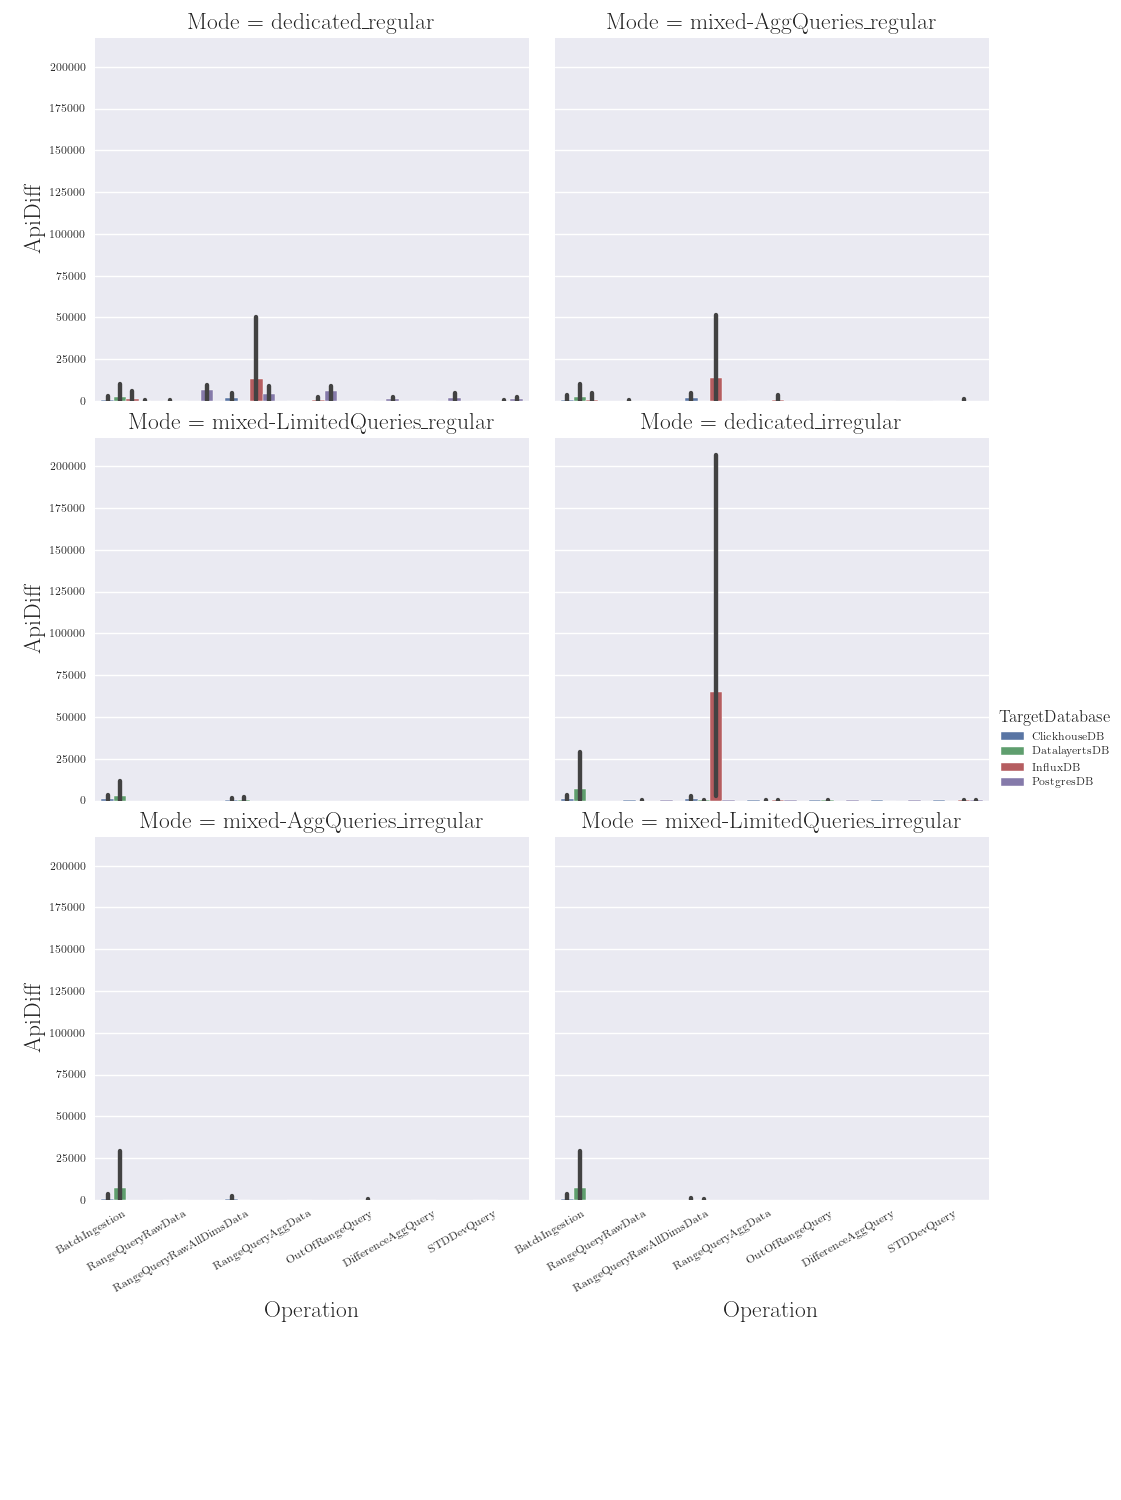

In [ ]:
# shows, how heavy the Client Implementation / API Calculations influences the Benchmark
CCA= results.assign(ApiDiff= lambda x: x.Latency*1.5 - x.Latency)
# .iloc[:100]

sns.catplot(data=CCA,kind='bar', x="Operation", y="ApiDiff", hue="TargetDatabase",col="Mode", col_wrap=2, errorbar=("pi"))
plt.yscale('log')
plt.gcf().autofmt_xdate()



 

# Ingestion Scenarios




## ingestion rate
### regular vs irregular: 

In [11]:
regularity_ingestion_rates=results.loc[results.Mode.str.contains('dedicated_')  ]  

first violin plot for each ClientsNumber per Database, then Bachsize per Database. After each graph a table with the mean values


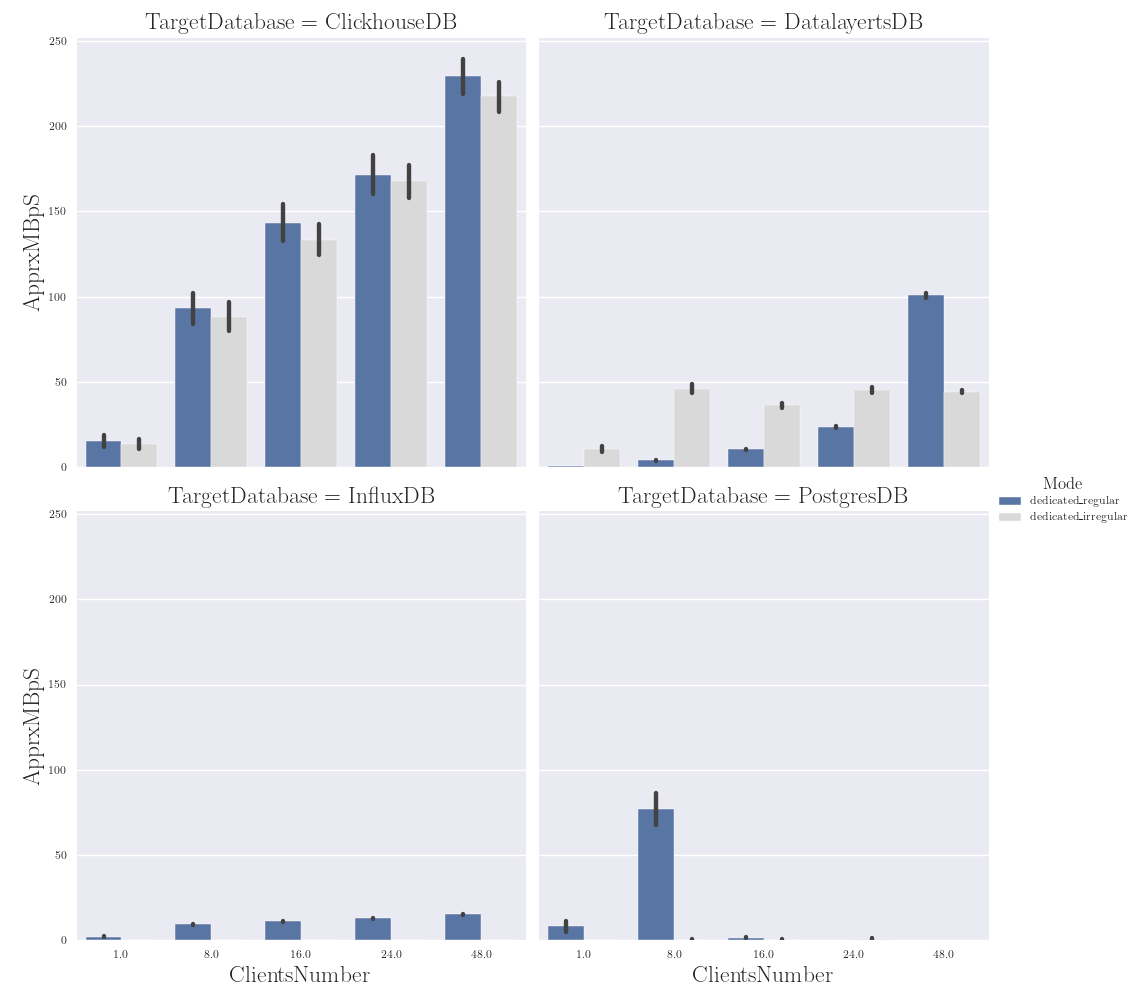

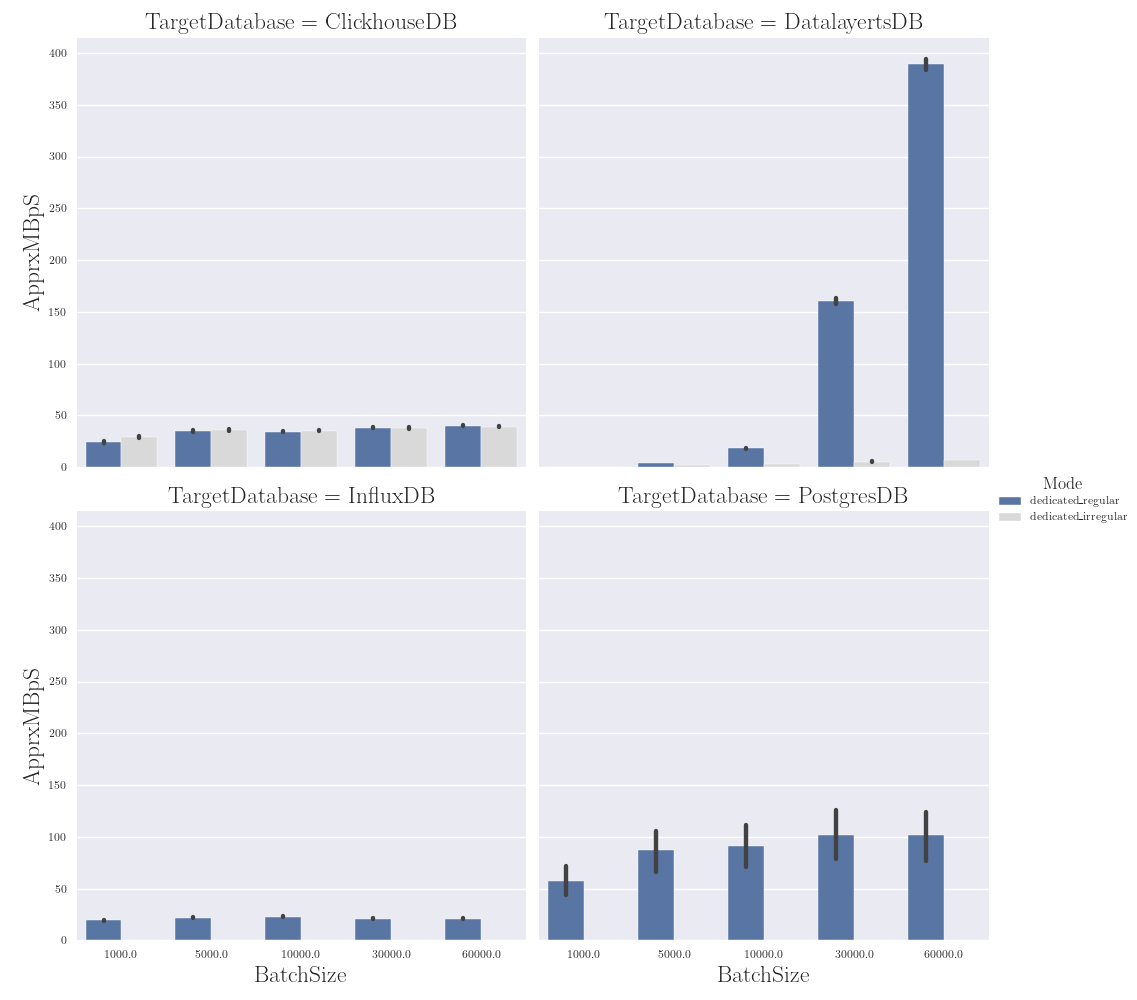

TOP RATES and their resp. CLientsNumbers and Batchsizes


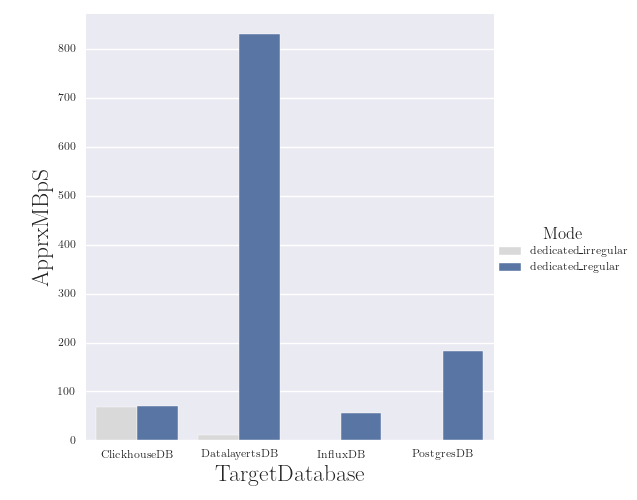

In [12]:
plt.gca()
plt.axis([None, None, 0, results.ApprxMBpS.max()])

print("first violin plot for each ClientsNumber per Database, then Bachsize per Database. After each graph a table with the mean values")

#ClientsNumber
# plt.figure("CN")
# plt.title("Comparison: Regular vs Irregular Data Transmission based on Number of Concurrent Clients")
sns.catplot(data=regularity_ingestion_rates,kind='bar', x="ClientsNumber", y="ApprxMBpS", hue="Mode",col="TargetDatabase", col_wrap=2,palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
plt.savefig(path+'regularityCN-violin.svg', format='svg')
plt.show()
plt.close()


# agg_regularityCN 
show_and_print(pd.DataFrame(data=regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','ClientsNumber'], as_index=False).agg({  "ApprxMBpS":'mean'  })) , 'reg_CN', './graphs/') 


 
#  Batchsize
# plt.figure("BS") 
# plt.title("Comparison: Regular vs Irregular Data Transmission based on Size of Batches")
sns.catplot(data=regularity_ingestion_rates,kind='bar', x="BatchSize", y="ApprxMBpS", hue="Mode",col="TargetDatabase", col_wrap=2,palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
plt.savefig(path+'regularityBS-violin.svg', format='svg')
plt.show()
plt.close()


# agg_regularityBS
show_and_print(pd.DataFrame(data= regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','BatchSize'], as_index=False).agg({  "ApprxMBpS":'mean'  })) , 'reg_BS', './graphs/') 
 
 
#  TOP Values   

print("TOP RATES and their resp. CLientsNumbers and Batchsizes")
show_and_print(pd.DataFrame(data=top_rates[top_rates['Mode'].str.contains('dedicated_') ]), 'reg_TOP', './graphs/') 


# plt.figure("TOP")
# plt.title("Comparison: Regular vs Irregular Data Transmission based on TOP Ingestion Rates across BS,CN,Dim parameters.")
sns.catplot(data= top_rates[top_rates['Mode'].str.contains('dedicated_') ] ,kind='bar', x="TargetDatabase", y="ApprxMBpS", hue="Mode", palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
plt.savefig(path+'regularityTOP.svg', format='svg')
plt.show()
plt.close()





### Multi Dim


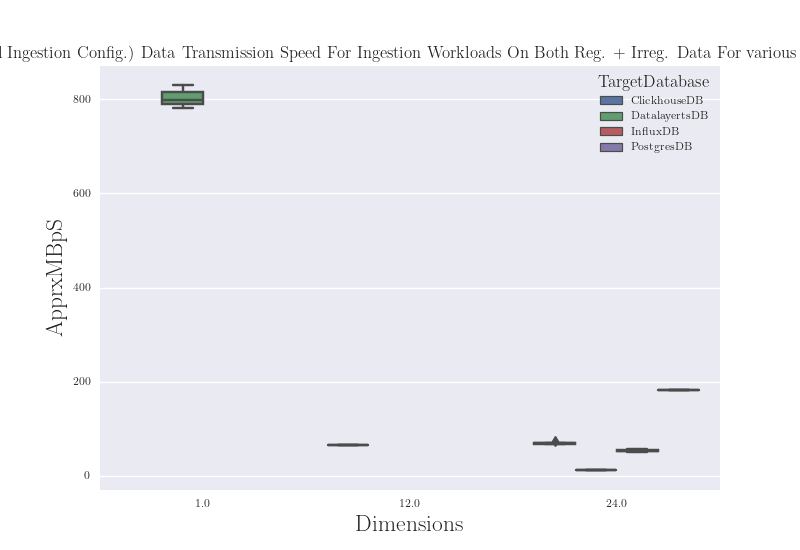

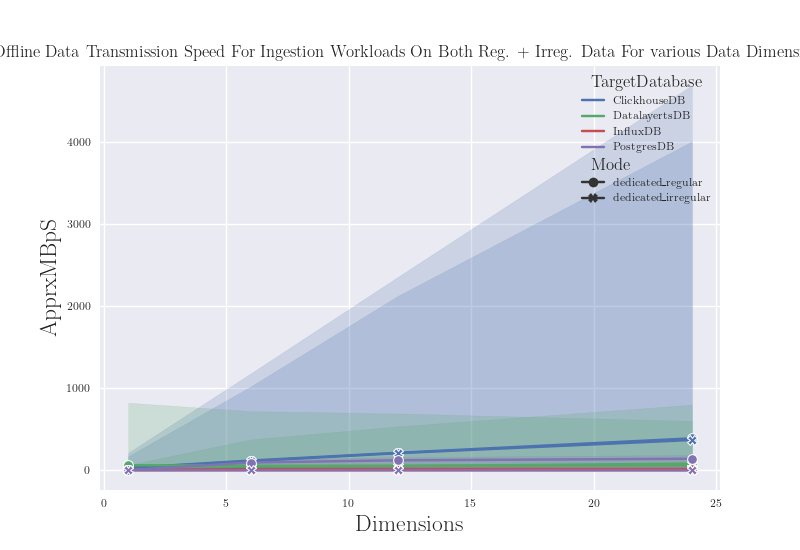

In [13]:
 

multidimIng_TOP_all = regularity_ingestion_rates.merge(top_rates, how='right'    )
# TODO lineplot with variance  , 99% quantil . 1 % quantil or min and max ,, like a mix between barplot and lineplots


plt.figure("multidim-box")
sns.boxplot(data= multidimIng_TOP_all, x="Dimensions", y="ApprxMBpS",   hue="TargetDatabase"  )
plt.yscale('log')
plt.title("TOP (Optimal Ingestion Config.) Data Transmission Speed For Ingestion Workloads On Both Reg. + Irreg. Data For various Data Dimensions")
plt.savefig(path+'multidim-I-BP.svg', format='svg')
plt.show()
plt.close()




plt.figure("multidim-line")
plt.title("Offline Data Transmission Speed For Ingestion Workloads On Both Reg. + Irreg. Data For various Data Dimensions")
plt.yscale('log')
sns.lineplot(data=regularity_ingestion_rates , x="Dimensions", y="ApprxMBpS", hue="TargetDatabase", style="Mode", markers=True, dashes=False, errorbar = ("pi"), err_style="band" )
plt.savefig(path+'multidim-I-linep.svg', format='svg')
plt.show()
plt.close()


#  TODO Multidim between big batch size and dim number: compare the speed on basis of Datapoints transfered, or with more onedim big-batches, or with smallbatch,highdim



# Consecutive Ingestion with 60k Bachsize and 48 Clients

In [14]:
# TODO populateShort

##  Ing System Metrics


In [15]:


 
 ### here a graph for mem and cpu over time from first TS of DatabaseOperationMode to Last. TODO

### regurlar vs irregular transaction system usage 


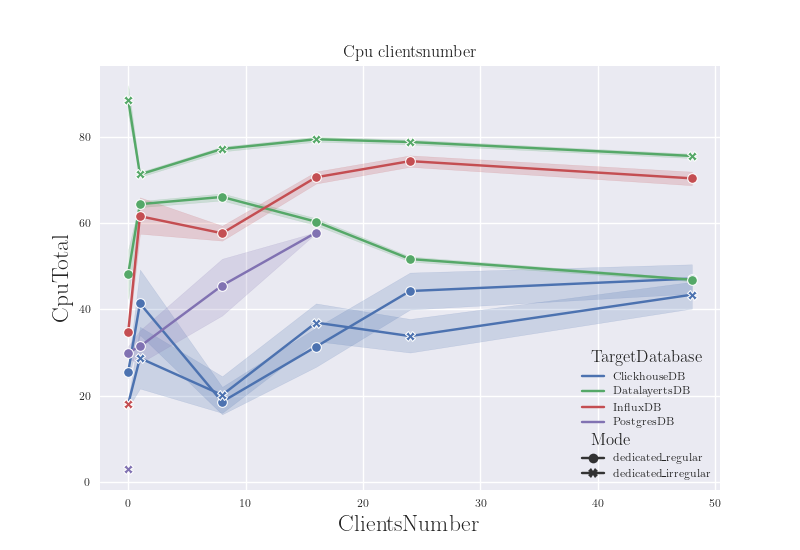

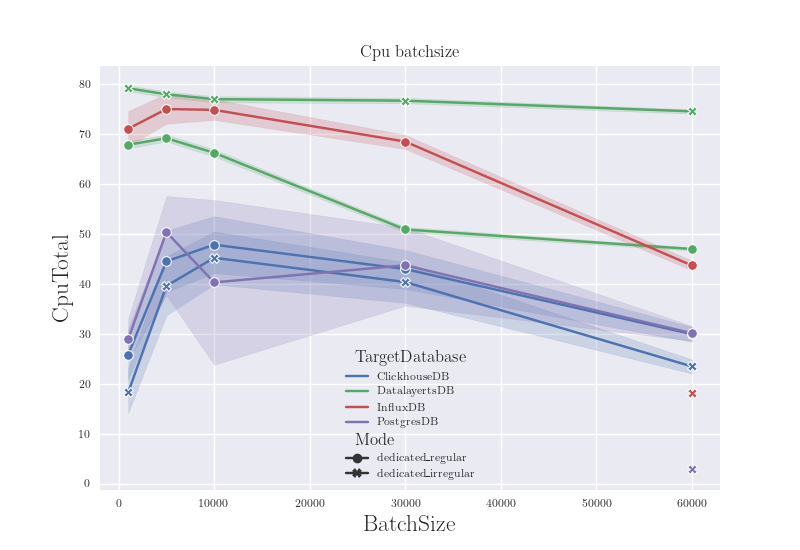

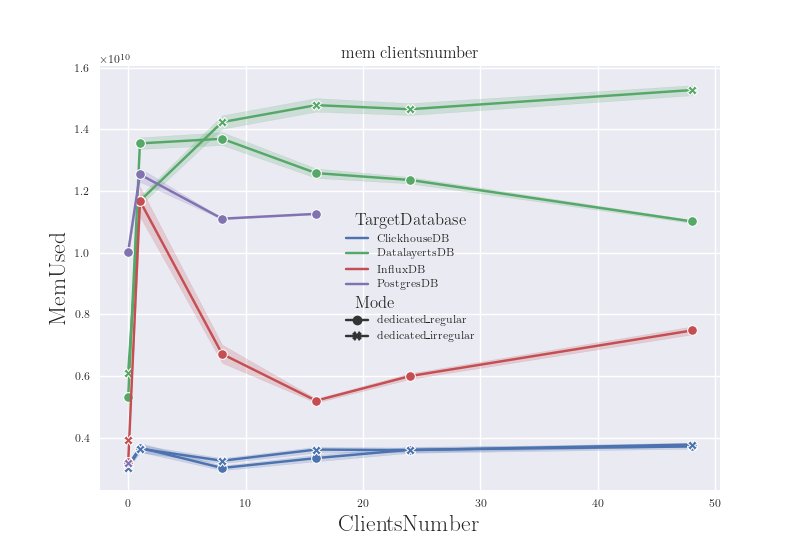

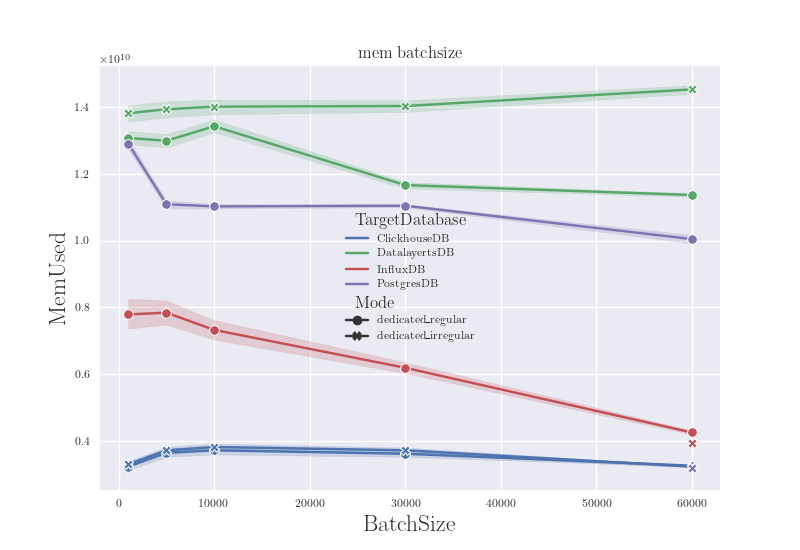

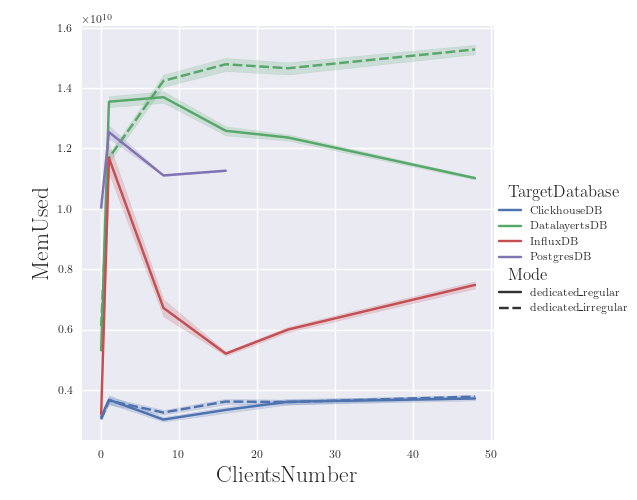

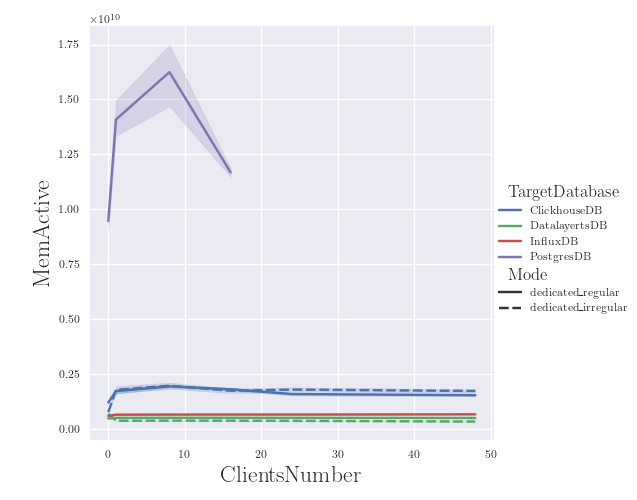

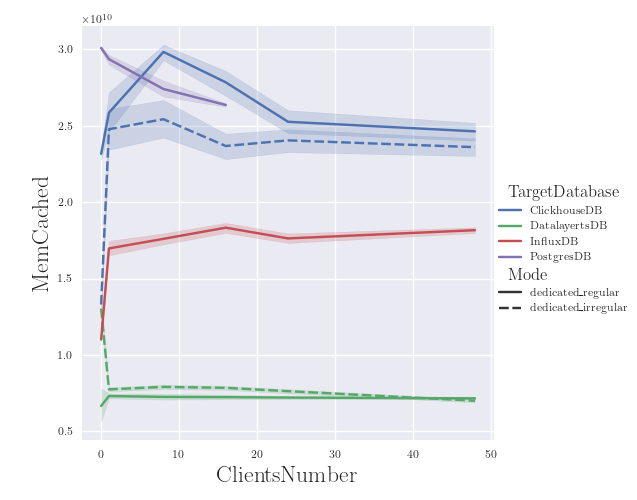

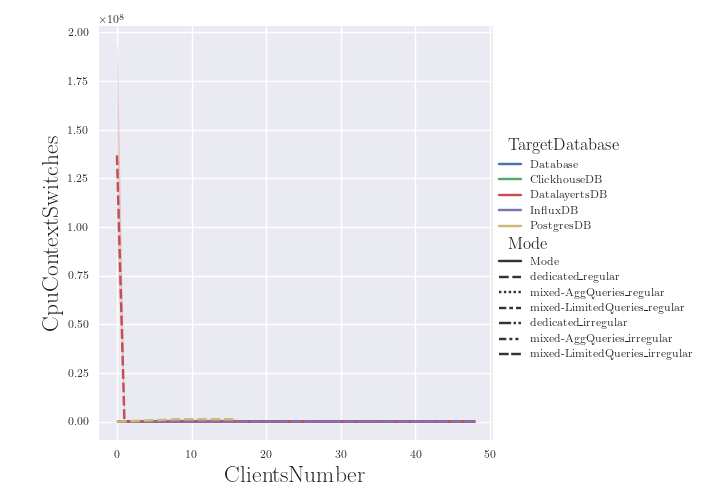

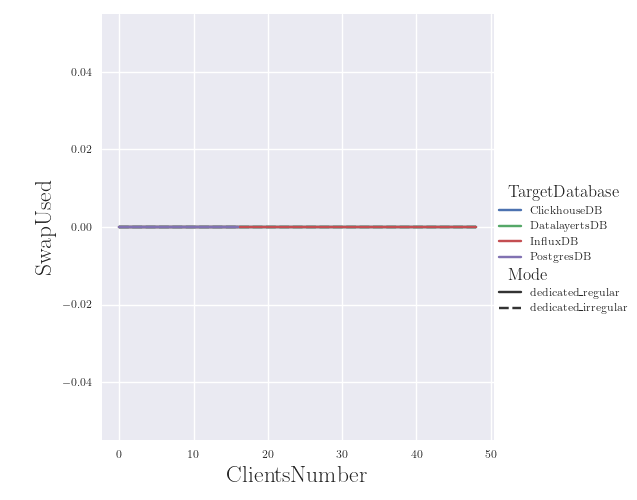

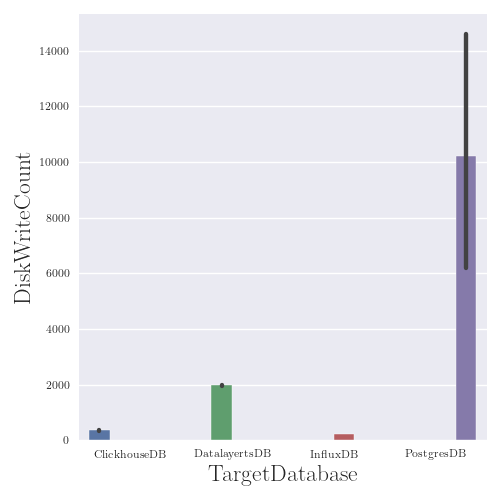

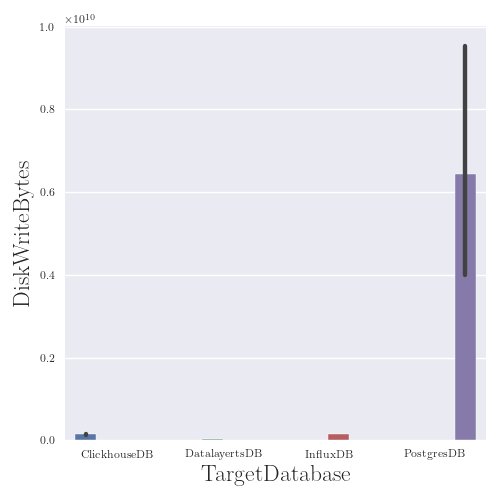

In [16]:
sysSelect=systemmetrics.groupby(['TargetDatabase','Dimensions', 'BatchSize', 'ClientsNumber','Mode','Operation'], as_index=False).agg(
    {  "CpuTotal":'mean' , "CpuContextSwitches":'mean'  , "MemActive":'mean'  , "MemUsed":'mean'  ,
     "MemCached":'mean'  , "SwapUsed":'mean'  , "DiskReadBytes":'mean'  , "DiskReadCount":'mean'  , "DiskWriteBytes":'mean'  , "DiskWriteCount":'mean' } # APPRxMBpS  :  MS to S -> DataArrays*Dimensions =Dtapaints. -> float to Byte -> byte to MB  IMPORTANT!! DLTS stores Double, so practically doubles the ingestion
    )


sysMeans = sysSelect.groupby(['TargetDatabase', 'ClientsNumber','Mode','Operation'], as_index=False).mean(numeric_only=True).reset_index()
systemmetricsDED=systemmetrics[systemmetrics['Mode'].str.contains("dedicated")]






plt.figure("Cpu-Cn")
plt.title("Cpu clientsnumber")

sns.lineplot(data= systemmetricsDED , x="ClientsNumber", y="CpuTotal", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.savefig(path+'cpu-cn.svg', format='svg')
plt.show()
plt.close()




plt.figure("Cpu-Bs")
plt.title("Cpu batchsize")

sns.lineplot(data= systemmetricsDED , x="BatchSize", y="CpuTotal", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.savefig( path+'Cpu-Bs.svg', format='svg')
plt.show()
plt.close()





###


plt.figure("Mem-Cn")
plt.title("mem clientsnumber")

sns.lineplot(data= systemmetricsDED , x="ClientsNumber", y="MemUsed", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.savefig(path+'mem-cn.svg', format='svg')
plt.show()
plt.close()




plt.figure("Mem-Bs")
plt.title("mem batchsize")

sns.lineplot(data= systemmetricsDED , x="BatchSize", y="MemUsed", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.savefig(path+'mem-Bs.svg', format='svg')
plt.show()
plt.close()





###

# plt.figure("used mem ")
# plt.title("mem used")

sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="MemUsed", hue="TargetDatabase", style="Mode")
plt.savefig(path+'mem-used.svg', format='svg')
plt.show()
plt.close()

# plt.figure("active mem ")
# plt.title("mem active")

sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="MemActive", hue="TargetDatabase", style="Mode")
plt.savefig(path+'mem-active.svg', format='svg')
plt.show()
plt.close()

# plt.figure("cache mem ")
# plt.title("mem cache")

sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="MemCached", hue="TargetDatabase", style="Mode")
plt.savefig(path+'mem-cache.svg', format='svg')
plt.show()
plt.close()


###

# plt.figure("cpu context switches ")
# plt.title("cpu context switches")

sns.relplot(data= systemmetrics  ,kind="line", x="ClientsNumber", y="CpuContextSwitches", hue="TargetDatabase", style="Mode")
plt.savefig(path+'cpu-context-switches.svg', format='svg')
plt.show()
plt.close()


# plt.figure("swap ")
# plt.title("swap")

sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="SwapUsed", hue="TargetDatabase", style="Mode")
plt.savefig(path+'swap.svg', format='svg')
plt.show()
plt.close()

####


# plt.figure("Ingestion Disk WriteCOunt ")
sns.catplot(data=systemmetricsDED[systemmetricsDED['Operation'].str.contains("Batch")], kind="bar", x='TargetDatabase' , y="DiskWriteCount", hue="TargetDatabase")

plt.savefig(path+'IngWriteCount.svg', format='svg')
plt.show()
plt.close()




# plt.figure("Ingestion Disk Write Bytes ")
sns.catplot(data=systemmetricsDED[systemmetricsDED['Operation'].str.contains("Batch")], kind="bar", x='TargetDatabase' , y="DiskWriteBytes", hue="TargetDatabase")

plt.savefig(path+'IngWriteBytes.svg', format='svg')
plt.show()
plt.close()



### multiDim transaction system usage

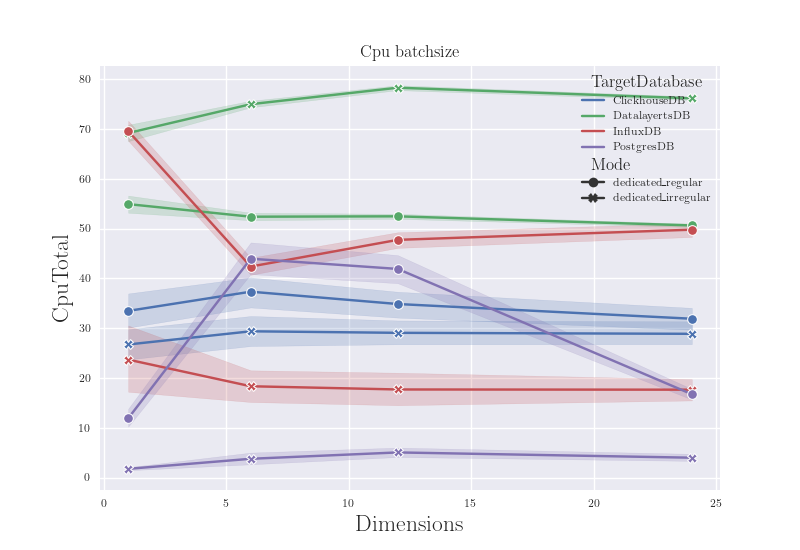

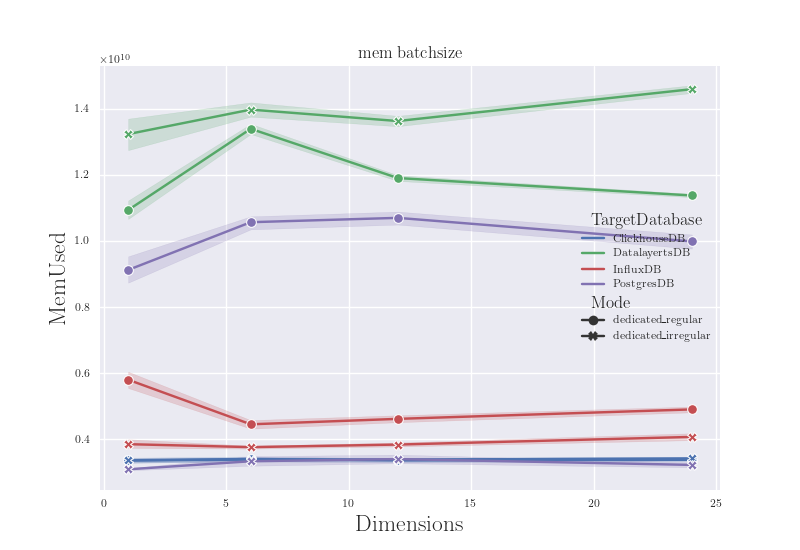

In [17]:




plt.figure("Cpu-Dim")
plt.title("Cpu batchsize")

sns.lineplot(data= systemmetricsDED , x="Dimensions", y="CpuTotal", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.savefig(path+'Cpu-Dim.svg', format='svg')
plt.show()
plt.close()


plt.figure("mem-Dim")
plt.title("mem batchsize")

sns.lineplot(data= systemmetricsDED , x="Dimensions", y="MemUsed", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.savefig(path+'mem-Dim.svg', format='svg')
plt.show()
plt.close()

## Scaling: How does the System behave with long-term ingestion?
### ingestion rate

In [18]:
# scaling_ingestion=results.loc[results["Mode"].str.contains["pop"]].assign(AlreadyIngested=results.groupby(['TargetDatabase'])["ValueArrays"].cumsum()  )  
   

# # plt.figure("TopConfig-scaling-Latency")
# # plt.title("TopConfig scaling Latency")
# sns.lineplot(data=scaling_ingestion , x="AlreadyIngested", y="ApprxMBpS", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
# plt.savefig(path+'scaleTopLatency.svg', format='svg')
# plt.show()
# plt.close()


 

### storage


In [19]:
# #diskusage since ingestionstart
# scaling_storage=scaling_ingestion.assign(FsUsed= lambda x: x.FsSize-x.FsFree)

# plt.figure("scaling-Storage")
# plt.title("  scaling Storage. Approximation, as some systemmetrics packets go lost in Transmission")
# sns.lineplot(data=scaling_storage , x="AlreadyIngested", y="FsUsed", hue="Database",  markers=True, dashes=False) #style="Mode",    .loc[scaling_storage['AlreadyIngested']>100]
# plt.savefig(path+'scaleStorage.svg', format='svg')
# plt.show()
# plt.close()

### CPU  

In [20]:
# plt.figure("scaling-CPU")
# plt.title("  scaling CPU")
# sns.lineplot(data=scaling_storage , x="AlreadyIngested", y="CpuTotal", hue="Database",  markers=True, dashes=False) #style="Mode",    .loc[scaling_storage['AlreadyIngested']>100]
# plt.savefig(path+'scaleCPU.svg', format='svg')
# plt.show()
# plt.close()

 

### memory

In [21]:
# plt.figure("scaling-Mem")
# plt.title("  scaling Mem")
# sns.lineplot(data=scaling_storage , x="AlreadyIngested", y="MemUsed", hue="Database",  markers=True, dashes=False) #style="Mode",    .loc[scaling_storage['AlreadyIngested']>100]
# plt.savefig(path+'scaleMem.svg', format='svg')
# plt.show()
# plt.close()



In [22]:
# plt.figure("scaling-SWap")
# plt.title("  scaling Swap")
# sns.lineplot(data=scaling_storage , x="AlreadyIngested", y="SwapUsed", hue="Database",  markers=True, dashes=False) #style="Mode",    .loc[scaling_storage['AlreadyIngested']>100]
# plt.savefig(path+'scaleSwap.svg', format='svg')
# plt.show()
# plt.close()


# Queries 


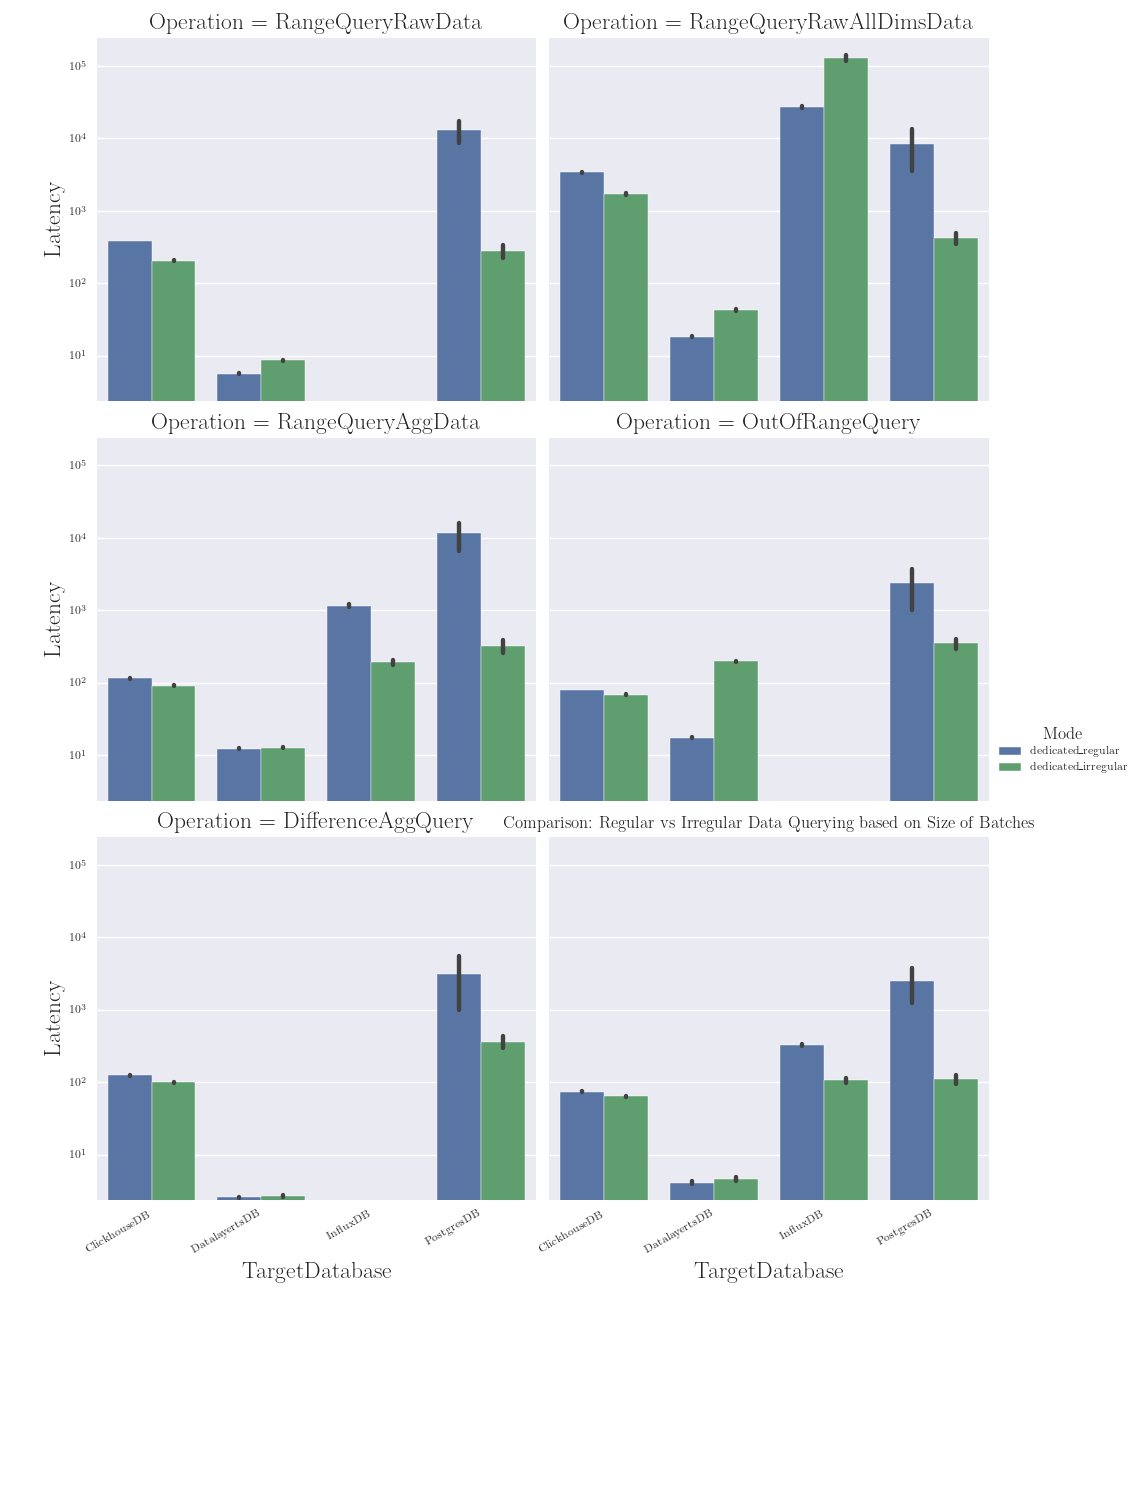

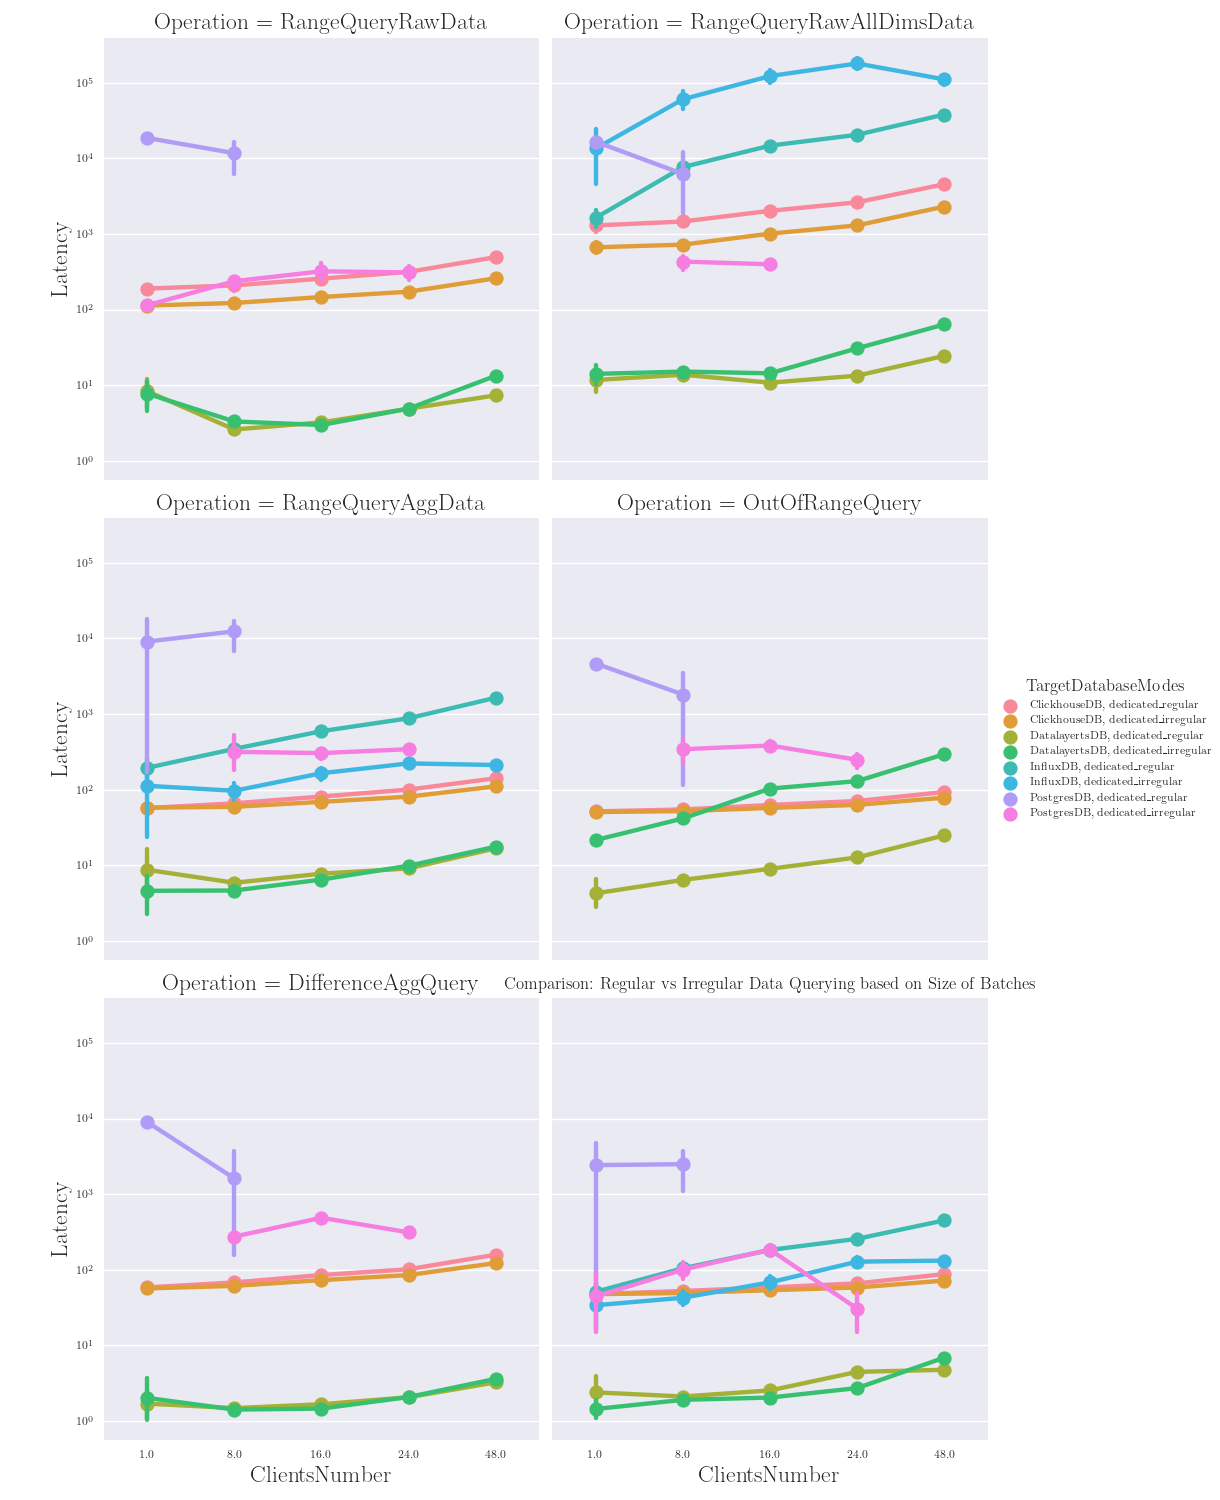

In [40]:


resultQueries= results.loc[results['Mode'].str.contains('ded') & results['Operation'].str.contains('Quer')].assign(TargetDatabaseModes= lambda x: x.TargetDatabase+", "+x.Mode)
# .assign(OperationModes= lambda x: x.Operation+", "+x.Mode)

# #Batchsize

sns.catplot(data= resultQueries, x="TargetDatabase", y="Latency",  hue="Mode", kind="bar", col="Operation", col_wrap=2 )
plt.yscale('log')
plt.gcf().autofmt_xdate()
plt.title("Comparison: Regular vs Irregular Data Querying based on Size of Batches")
plt.savefig(path+'QregularityBS-violin.svg', format='svg')
plt.show()
plt.close()

# #Batchsize

sns.catplot(data= resultQueries, x="ClientsNumber", y="Latency",  hue="TargetDatabaseModes", kind="point" , col="Operation", col_wrap=2 )
plt.yscale('log')
plt.title("Comparison: Regular vs Irregular Data Querying based on Size of Batches")
plt.savefig(path+'QregularityBS-violin.svg', format='svg')
plt.show()
plt.close()





In [ ]:
# latency


show_query_stat('RangeQueryRawData')
show_query_stat('RangeQueryRawAllDimsData')

In [ ]:
show_query_stat('OutOfRangeQuery')


In [ ]:
show_query_stat('STDDevQuery')

In [ ]:
show_query_stat('RangeQueryAggData')


In [ ]:
show_query_stat('DifferenceAggQuery')

## Multidim Query stats

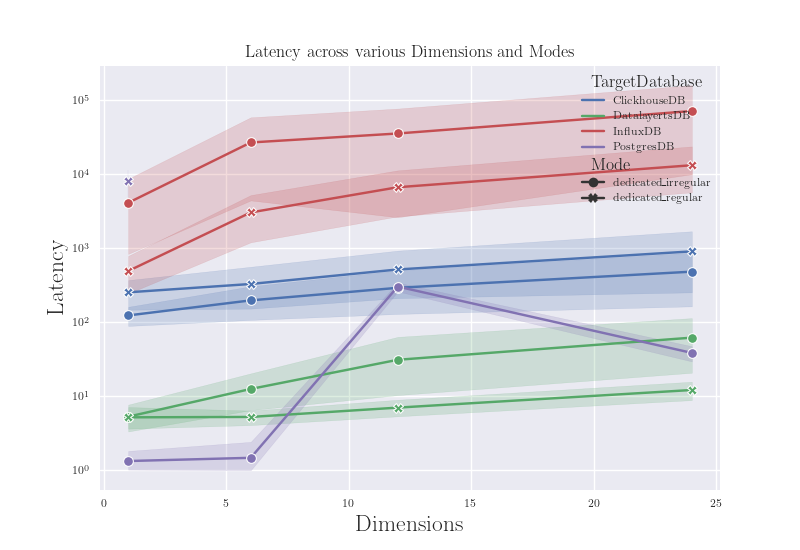

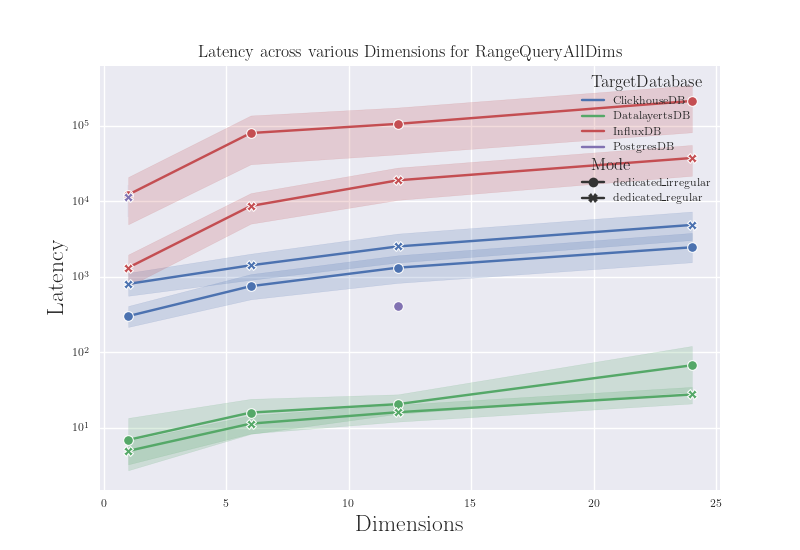

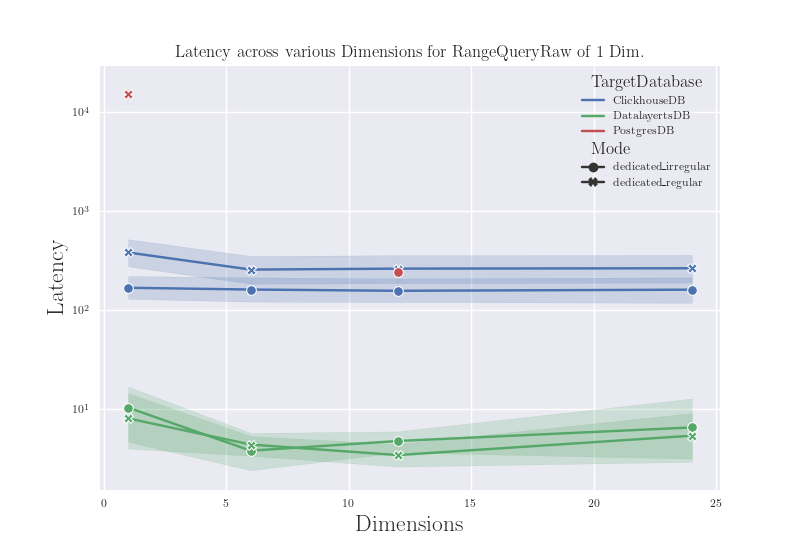

In [41]:
 
plt.figure("Q-Dim-Mode")
plt.title("Latency across various Dimensions and Modes")

sns.lineplot(data= result_ratesR.loc[result_ratesR['Mode'].str.contains('ded')]  , x="Dimensions", y="Latency", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.yscale('log')
plt.savefig(path+'Q-Dim.svg', format='svg') #svg
plt.show()
plt.close()



  
plt.figure("Q-Dim-Op-A")
plt.title("Latency across various Dimensions for RangeQueryAllDims")

sns.lineplot(data= result_ratesR.loc[result_ratesR['Mode'].str.contains('ded')].loc[result_ratesR['Operation'].str.contains('RangeQueryRawAllDimsData')]  , x="Dimensions", y="Latency", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.yscale('log')
plt.savefig(path+'Q-Dim.svg', format='svg') #svg
plt.show()
plt.close()


plt.figure("Q-Dim-Op-1")
plt.title("Latency across various Dimensions for RangeQueryRaw of 1 Dim.")

sns.lineplot(data= result_ratesR.loc[result_ratesR['Mode'].str.contains('ded')].loc[result_ratesR['Operation'].str.contains('RangeQueryRawData')]  , x="Dimensions", y="Latency", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.yscale('log')
plt.savefig(path+'Q-Dim.svg', format='svg') #svg
plt.show()
plt.close()




 


## Query System Metrics


### regurlar vs irregular transaction system usage 


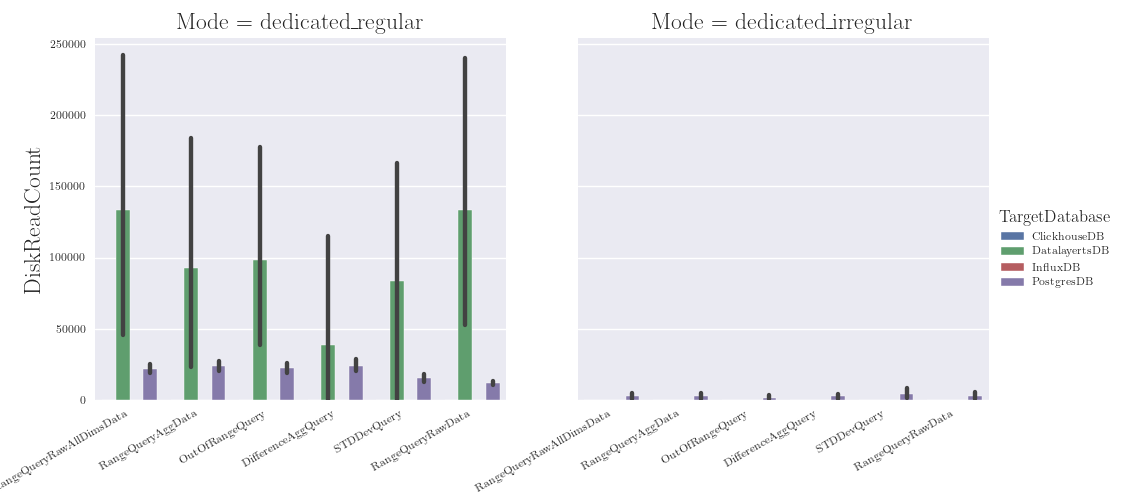

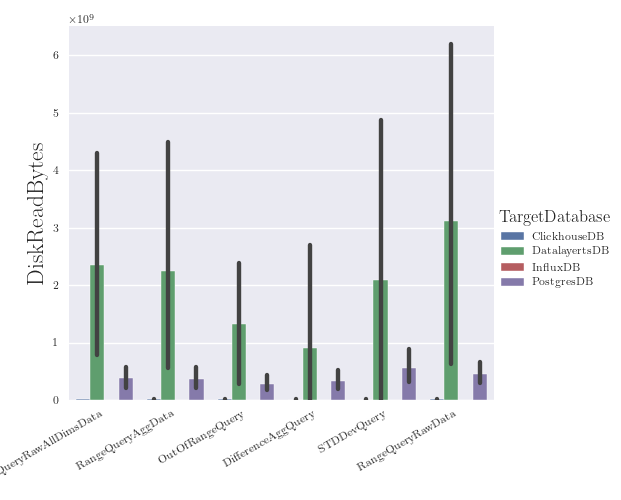

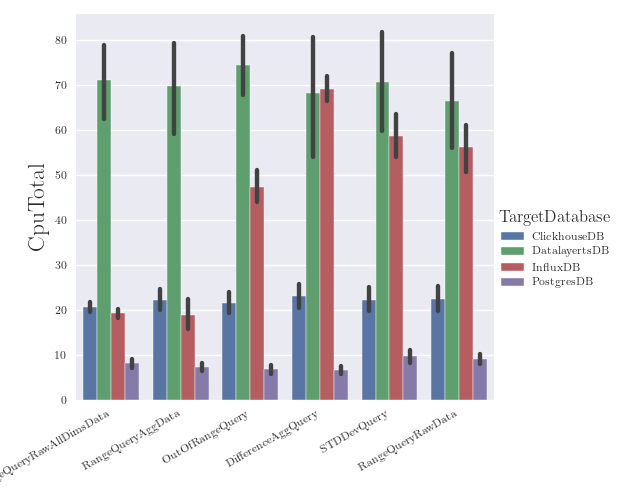

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [45]:
systemmetricsDED_R= systemmetricsDED[systemmetricsDED['Operation'].str.contains("Query")]
 




# plt.figure("Q-Disk-Read-COunt-OP")
sns.catplot(data=systemmetricsDED_R, kind="bar", x='Operation' , y="DiskReadCount", hue="TargetDatabase", col='Mode')
plt.gcf().autofmt_xdate()
plt.savefig(path+'QreadCount.svg', format='svg')
plt.show()
plt.close()




# plt.figure("Qu-Disk-Read-Bytes-OP")
sns.catplot(data=systemmetricsDED_R, kind="bar", x='Operation' , y="DiskReadBytes", hue="TargetDatabase")
plt.gcf().autofmt_xdate()
plt.savefig(path+'QreadBytes.svg', format='svg')
plt.show()
plt.close()




# plt.figure("Q-CPU-OP")
# plt.title("Cpu query")
sns.catplot(data=systemmetricsDED_R, kind="bar", x='Operation' , y="CpuTotal", hue="TargetDatabase")
plt.gcf().autofmt_xdate()
plt.savefig(path+'cpu-query.svg', format='svg')
plt.show()
plt.close()


# plt.figure("Q-Mem-OP")
# plt.title("Cpu query")
sns.catplot(data=systemmetricsDED_R, kind="bar", x='Operation' , y="MemTotal", hue="TargetDatabase")
plt.gcf().autofmt_xdate()
plt.savefig(path+'cpu-query.svg', format='svg')
plt.show()
plt.close()




# plt.figure("Q-Mem-Mode-OP")
# plt.title("Cpu query")
sns.lineplot(data= systemmetricsDED_R , x="Operation", y="MemTotal", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.gcf().autofmt_xdate()  
plt.savefig(path+'cpu-query.svg', format='svg')
plt.show()
plt.close()


### multiDim transaction system usage

In [ ]:
%%

# Mixed, Online Workloads

In [ ]:
  
# mixedWL_rates=query_rates.groupby(['TargetDatabase','Mode','Operation'],as_index= False).agg({'Latency':'mean','ValuePoints':'mean','ApprxMBpS':'mean'}).merge(
#     ingestion_rates.groupby(['TargetDatabase','Mode','Operation'],as_index= False).agg({'Latency':'mean','ValuePoints':'mean','ApprxMBpS':'mean'}) , how='outer'  , on=['TargetDatabase','Mode','Operation','Latency','ValuePoints','ApprxMBpS'] 
#     )
# mixedWL_rates=mixedWL_rates[mixedWL_rates['Mode'].str.contains('mixed')]
# mixedWL_rates['Percentage'] = mixedWL_rates['Mode'].str.extract('(\d+)', expand=False)


## Ingestion

In [46]:
mixedQueries_results = results[results['Mode'].str.contains('mixed')].assign(Mode_OP = lambda x: x.Mode + x.Operation).assign(OP_R = lambda x: x.Operation + " " + x.Regularity)
mixedQueries_results['Percentage'] = mixedQueries_results['Mode'].str.extract('(\d+)', expand=False)
mixedQueries_results['Percentage'] = pd.to_numeric(mixedQueries_results['Percentage'] , errors = 'coerce' )

# [['TargetDatabase','Mode','Operation','Latency','ApprxMBpS','ValuePoints']
#        ].loc[results['Mode']==['mixedQueries_regular','mixedQueries_irregular'] ]

# General overview and mean values across BS CN DIM ...

import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")
plt.figure("MQ-R")

# fig.suptitle('Horizontally stacked subplots')

# fig, (ax1, ax2 ) = plt.subplots(1, 2)

# # Draw a nested violinplot and split the violins for easier comparison
# ax1 = sns.violinplot(data=mixedQueries_results[mixedQueries_results['Percentage'].str.contains('25')], x="TargetDatabase", y="Latency", hue="Regularity",
#                split=True, inner="quart", 
#                palette={"regular": "b", "irregular": ".85"})

# ax2 = sns.violinplot(data=mixedQueries_results[mixedQueries_results['Percentage'].str.contains('50')], x="TargetDatabase", y="Latency", hue="Regularity",
#                split=True, inner="quart", 
#                palette={"regular": "r", "irregular": ".85"})

# sns.violinplot(data=mixedQueries_results[mixedQueries_results['Percentage'].str.contains('75')], x="TargetDatabase", y="Latency", hue="Regularity",
#                split=True, inner="quart", 
#                palette={"regular": "g", "irregular": ".85"})

import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset

# Draw a pointplot to show pulse as a function of three categorical factors
# sns.catplot(
#     data=mixedQueries_results[mixedQueries_results['Mode'].str.contains('Ingestion')],x="Percentage", y="Latency", hue="TargetDatabase", col="Regularity", 
#     capsize=.2, palette="YlGnBu_d", errorbar="se",
#     kind="point", height=6, aspect=.75,
# )
plt.figure("mx-bar")
sns.catplot( # bar or point? 
    data=mixedQueries_results,x="Percentage", y="Latency", hue="TargetDatabase", col="OP_R",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)

sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Transmission Latency across various mixed (online) Workload configuration.")
plt.savefig(path+'mixedBar.svg', format='svg')
plt.show()
plt.close()



plt.figure("mx-line")
sns.lineplot( # bar or point? 
    data=mixedQueries_results,x="Percentage", y="Latency", hue="TargetDatabase", style="Regularity"
    
)
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Transmission Latency across various mixed (online) Workload configuration.")
plt.savefig(path+'mixedLine.svg', format='svg')
plt.show()
plt.close()

# ## grouped boxplot

# import seaborn as sns
# sns.set_theme(style="ticks", palette="pastel")

# plt.figure("MQ-R")
# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="Percentage", y="Latency",
#             hue="Mode_OP", palette=["m", "g","b","r","y","w"],
#             data=mixedQueries_results_reg)
# sns.despine(offset=10, trim=True)
# plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Regular Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-groupedBP-R.svg', format='svg')
# plt.show()
# plt.close()

# plt.figure("MQ-IR")

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Mode_OP", palette=[ "g","b","r"],
#             data=mixedQueries_results_irreg)
# sns.despine(offset=10, trim=True)
# plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Irregular Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-groupedBP-IR.svg', format='svg')
# plt.show()
# plt.close()

# # select TOP RATE CONFIG from base ingestion and analyse mixed WL

mixedQueries_TOP_results = mixedQueries_results.merge(top_rates, how='inner', on=['TargetDatabase','BatchSize','ClientsNumber','Dimensions'] )

plt.figure("TOP-mx-line")
sns.lineplot( # bar or point? 
    data=mixedQueries_TOP_results,x="Percentage", y="ApprxMBpS", hue="TargetDatabase", style="Regularity"
    
)
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Transmission Latency across various mixed (online) Workload configuration ,having OPTIMAL Ingestion parameters.")
plt.savefig(path+'mixedLine-TOP.svg', format='svg')
plt.show()
plt.close()

# plt.figure("MQ-TOP_I")

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Mode_OP", palette=["m", "g","b","r","y","w"],
#             data= mixedQueries_TOP_results[mixedQueries_TOP_results['Operation'].str.contains('Ingestion')] )
# sns.despine(offset=10, trim=True)
# plt.title("TOP (Optimal Ingestion Config.) Latency For Ingestion Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-TOP-I-groupedBP.svg', format='svg')
# plt.show()
# plt.close()

# plt.figure("MQ-TOP_Q")

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Mode_OP", palette=["m", "g","b","r","y","w"],
#             data= mixedQueries_TOP_results[mixedQueries_TOP_results['Operation'].str.contains('Query')] )
# sns.despine(offset=10, trim=True)
# plt.title("TOP (Optimal Ingestion Config.) Latency For Query Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-TOP-Q-groupedBP.svg', format='svg')
# plt.show()
# plt.close()



SyntaxError: invalid syntax (3008712166.py, line 69)

## Query

ValueError: Could not interpret input 'DB_Mode'

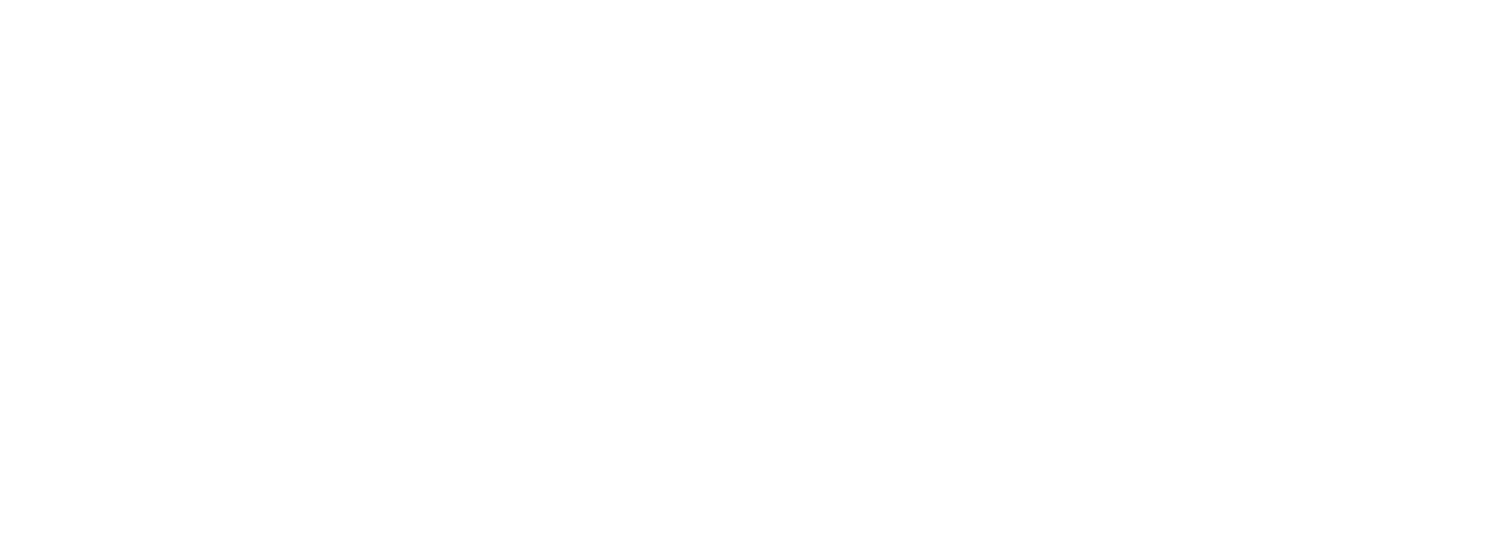

In [ ]:
mixedPoints_results_reg= results[results['Mode'].str.contains('mixedPoints_reg')].assign(Mode_OP = lambda x: x.Mode + x.Operation)
mixedPoints_results_reg['Percentage'] = mixedPoints_results_reg['Mode'].str.extract('(\d+)', expand=False)


mixedPoints_results_irreg = results[results['Mode'].str.contains('mixedPoints_irreg')].assign(Mode_OP = lambda x: x.Mode + x.Operation)
mixedPoints_results_irreg['Percentage'] = mixedPoints_results_irreg['Mode'].str.extract('(\d+)', expand=False)


# [['TargetDatabase','Mode','Operation','Latency','ApprxMBpS','ValuePoints']
#        ].loc[results['Mode']==['mixedPoints_regular','mixedPoints_irregular'] ]




# General overview and mean values across BS CN DIM ...




## grouped boxplot

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")


plt.figure("MP-R")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Percentage", y="Latency",
            hue="DB_Mode", palette=["m", "g","b","r","y","w"],
            data=mixedPoints_results_reg)
sns.despine(offset=10, trim=True)
plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Regular Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig(path+'mixedP-groupedBP-R.svg', format='svg')
plt.show()
plt.close()





plt.figure("MP-IR")

sns.boxplot(x="TargetDatabase", y="Latency",
            hue="Mode_OP", palette=["m", "g","b","r","y","w"],
            data=mixedPoints_results_irreg)
sns.despine(offset=10, trim=True)
plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Regular Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig(path+'mixedP-groupedBP-IR.svg', format='svg')
plt.show()
plt.close()





mixedPoints_TOP_results = results[results['Mode'].str.contains('mixedPoints')].assign(Mode_OP = lambda x: x.Mode + x.Operation).merge(top_rates, how='right', on=['TargetDatabase','BatchSize','ClientsNumber'] )




plt.figure("MP-TOP_I")

sns.boxplot(x="TargetDatabase", y="Latency",
            hue="Mode_OP", palette=["m", "g","b","r","y","w"],
            data= mixedPoints_TOP_results[mixedPoints_TOP_results['Operation'].str.contains('Ingestion')] )
sns.despine(offset=10, trim=True)
plt.title("TOP (Optimal Ingestion Config.) Latency For Ingestion Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig(path+'mixedP-TOP-I-groupedBP.svg', format='svg')
plt.show()
plt.close()


plt.figure("MP-TOP_Q")

sns.boxplot(x="TargetDatabase", y="Latency",
            hue="Mode_OP", palette=["m", "g","b","r","y","w"],
            data= mixedPoints_TOP_results[mixedPoints_TOP_results['Operation'].str.contains('Query')] )
sns.despine(offset=10, trim=True)
plt.title("TOP (Optimal Ingestion Config.) Latency For Query Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig(path+'mixedP-TOP-Q-groupedBP.svg', format='svg')
plt.show()
plt.close()



## System Metrics

In [ ]:
# ok
#
#
#

# 
#
#
#
#
